# Practical Lab 2 - Data Visualization and Publication

In [1]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

## Plot 1: Stock Prices using plotly

For my first graph I want to demonstrate how to use plotly to plot the historical prices of a stock using a candlestick chart.  I chose to do this because one of my goals for this program is to learn how to apply machine learning methods to financial markets.

For this demonstration, I will be using the historical price data of Unity, which is a software used for game development.  I chose Unity simply because I am currently learning how to use Unity.

In [2]:
unity = pd.read_csv("U.csv")

fig = go.Figure(data = [go.Candlestick(x = unity['Date'],
                open = unity['Open'],
                high = unity['High'],
                low = unity['Low'],
                close = unity['Close'])])

fig.update_layout(
    title = "Unity Stock Prices",
    yaxis_title = "Price",
    xaxis_title = "Date",
    xaxis_rangeslider_visible = False
)
fig.show()

A candlestick can be read as follows:
* The tops and bottoms of each stick represent the highest and lowest price that the stock reached during that period.  Since this is a daily time frame, each top and bottom represents the highest and lowest price the stock moved that day.
* The bodies of each candlestick are a bit more dynamic.  Each end of the bodies represents the open price or the close price of the stock during that period.  Since this is a daily time frame, the ends of the bodies represent the price that the stock started the day with or the price that the stock finished the day with.
  *  If the candlestick is green, that means that the bottom of the body is the opening price, and the top of the body is the closing price.  The candlestick being green means that the stock ended the day at a higher price than the stock started the day with.
  * If the candlestick is red, that means that the top of the bosy is the opening price, and the bottom of the body is the closing price.  The candlestick being red means that the stock ended the day at a lower price than the stock started the day with.

## Plot 2: Plotting Relative Strength Index with matplotlib

The Relative Strength Index (RSI) is an indicator that measures how overbought or oversold a stock is.  The formula for RSI is $RSI = 100 - [\frac{100}{1 + \frac{n_{up}}{n_{down}}}]$, where $n_{up}$ and $n_{down}$ are the average gains and average losses respectively over the period.  A general rule-of-thumb is that when the RSI is above 70, the stock is considered overbought, and it is a signal that the stock price will start going down.  Conversely, when the RSI is below 30, the stock is considered oversold, and it is a signla that the stock price will start increasing.

First, we need to write a function that takes in the data of the stock and the reference period, and outputs the RSI values:

In [3]:
def rsi(stockData, period):

    open = stockData['Open']
    close = stockData['Close']
    returns = (close - open)/close

    intialReturns = returns[0:period]
    avgGain = sum(intialReturns[intialReturns >= 0])/period
    avgLoss = abs(sum(intialReturns[intialReturns < 0]))/period
    rsi1 = 100 - (100 / (1 + avgGain / avgLoss))
    rsIndexes = np.array([])

    for i in range(period, len(returns) - 1):
        intialReturns = returns[(i - period):i]
        avgGain = sum(intialReturns[intialReturns >= 0])/period
        avgLoss = abs(sum(intialReturns[intialReturns < 0]))/period
        rsIndexes = np.append(rsIndexes, 100 - (100 / (1 + avgGain / avgLoss)))
    
    return rsIndexes

rsiValues = rsi(unity, 10)

Using matplotlib, we can now plot the relative strength index of Unity stock.  We will also add horizontal lines at $RSI = 30$ and $RSI = 70$ to indicate when the stock might be oversold or overbought.

Text(0, 0.5, 'RSI')

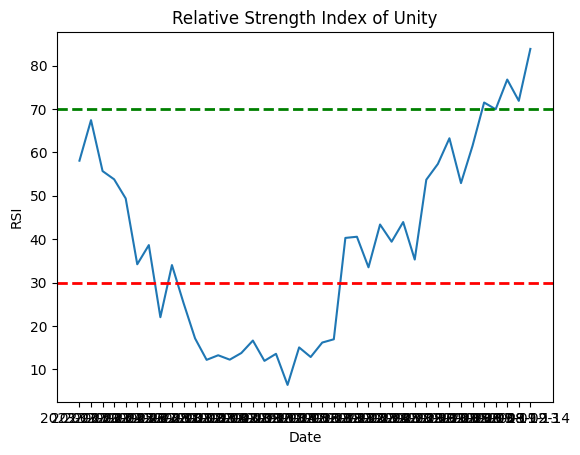

In [4]:
dates = unity['Date'][(len(unity['Date']) - len(rsiValues)):len(unity['Date'])] # Getting the dates that correspond with the values in RSI

fig, ax = plt.subplots()  
ax.plot(dates, rsiValues)
plt.axhline(y = 70, color = 'g', linestyle = '--', linewidth = 2)
plt.axhline(y = 30, color = 'r', linestyle = '--', linewidth = 2) 
plt.title("Relative Strength Index of Unity")
plt.xlabel('Date') 
plt.ylabel('RSI') 

The dates are difficult to read, but we can see that the stock was oversold towards the middle.  The stock is also currently overbought, which suggests that the price might go down.

## Plot 3: Analysis of Returns with Seaborn

For my next chart, I want to compare the total gains and total losses between Microsoft and AMD.  I chose these two stocks because Microsoft is considered to be a low-risk stock, while AMD is considered to be a high-risk stock.  Using a bar chart, I want to visually show the differences between profits and losses.

In order to plot this efficiently, we need to organize the data so that the barplot function can read everything easily.  To do this, we will:
* Load in the data for Microsoft and AMD
* Calculate the returns for each stock and put the results into their own data frame
* Add a column that indicates whether the price corresponds to MSFT or AMD
  * The barplot function will use this column to determine how to group the bars
* Add a column that indicates whether the stock price was positive or negative for that observation
  * The barplot function will use this column to determine how to split the grouped bars
* Mutate the returns so that they are all positive
  * This is just so the "POSITIVE" and "NEGATIVE" bars still go in the same direction

In [5]:
microsoft = pd.read_csv("MSFT.csv")
amd = pd.read_csv("AMD.csv")

microsoftReturns = (microsoft['Close'] - microsoft['Open']) / microsoft['Open']
amdReturns = (amd['Close'] - amd['Open']) / amd['Open']

microsoftDF = pd.DataFrame(data = {'Symbol': ['MSFT'] * len(microsoftReturns),
                                   'Return': microsoftReturns})
amdDF = pd.DataFrame(data = {'Symbol': ['AMD'] * len(amdReturns),
                             'Return': amdReturns})

stockData = pd.concat([microsoftDF, amdDF], axis = 0)
stockData = stockData.reset_index(drop = True)

returnDirection = [''] * len(stockData)
for i in range(len(stockData)):
    returnDirection[i] = "POSITIVE" if stockData['Return'][i] >= 0 else "NEGATIVE"

stockData['Direction'] = returnDirection
stockData['Return'] = abs(stockData['Return'])
print(stockData)

    Symbol    Return Direction
0     MSFT  0.001965  POSITIVE
1     MSFT  0.008455  POSITIVE
2     MSFT  0.001570  POSITIVE
3     MSFT  0.021779  NEGATIVE
4     MSFT  0.013074  POSITIVE
..     ...       ...       ...
497    AMD  0.018636  NEGATIVE
498    AMD  0.010653  POSITIVE
499    AMD  0.024834  POSITIVE
500    AMD  0.016601  NEGATIVE
501    AMD  0.043179  NEGATIVE

[502 rows x 3 columns]


Now that we have all the columns we need, we move on to graphing the returns.

<Axes: xlabel='Symbol', ylabel='Return'>

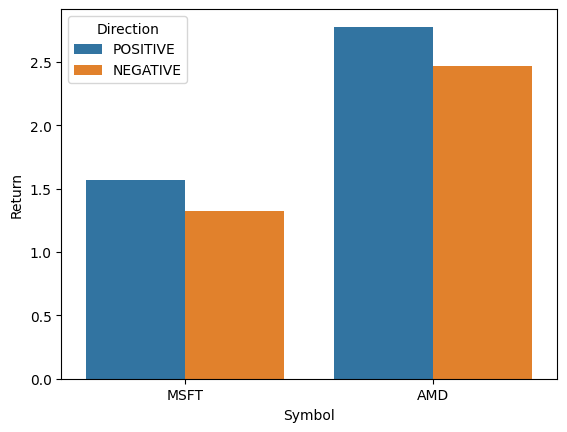

In [6]:
sb.barplot(data = stockData, x = "Symbol", y = "Return", hue = "Direction", estimator = sum, errorbar = None)

From the bar graph, we can see that both MSFT and AMD are generally profitable.  While AMD has significantly higher total profits, it also has significantly higher total losses.  This is why a stock like Microsoft is generally considered low-risk, while a stock like AMD is generally considered high-risk.  While both stocks appear to have about the same net-profit (AMD appears to be slightly higher), there is less volatility in Microsoft.

## Plot 4: Plotting Functions

This last plot will not be a finance plot.  However, I did want to practice plotting various functions and lines-of-best-fit, especially since we will be studying linear regression shortly.

We will start by generating some data.

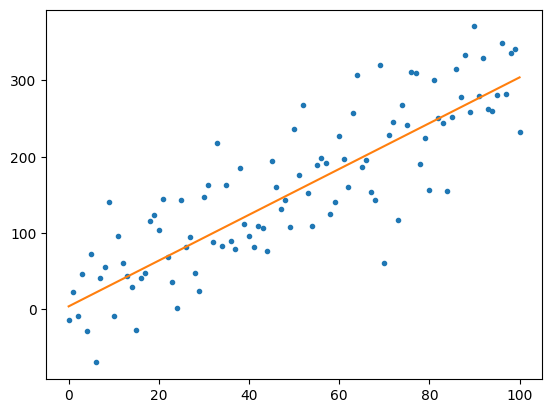

In [7]:
def func(x):
    y = 3*x + 4
    return y

xvals = np.arange(0, 101, 1)

mean = 0
std = 50
yvals = func(xvals) + np.random.normal(mean, std, 101)

fig, lineplot = plt.subplots()  
lineplot.plot(xvals, yvals, '.')
lineplot.plot(xvals, func(xvals))

Above, we generated data centred around a line with slope of 3 and a y-intercept of 4.  We then overlayed the actual line with slope 3 and y-intercept 4.  When we move on to linear regression, I would like to use the above structure for graphing.  However, instead of using a predetermined slope and y-intercept, these values would be calculated using regression.